### Read in all Sales analysis csv's and perform EDA



In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
#Create a list of all files in current directory
all_files = os.listdir('../input/sales-analysis-2019-excercise/SalesAnalysis/Sales_Data')

In [3]:
# Create an empty list to assign csv files
csv_files = []

# Create a lis of only the csv files in current directory
for file in all_files:
    if file[-3:] == 'csv':
        csv_files.append(file)
    else: 
        pass

csv_files
        

['Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_February_2019.csv',
 'Sales_November_2019.csv',
 'Sales_January_2019.csv',
 'Sales_March_2019.csv',
 'Sales_September_2019.csv',
 'Sales_April_2019.csv',
 'Sales_July_2019.csv',
 'Sales_October_2019.csv',
 'Sales_June_2019.csv',
 'Sales_December_2019.csv']

In [4]:
df_og = pd.concat((pd.read_csv("../input/sales-analysis-2019-excercise/SalesAnalysis/Sales_Data/"+f) for f in csv_files))


In [5]:
#create a of of original df

df = df_og.copy(deep=True)

# Lower case all the columns as a convenience

df.columns = df.columns.str.lower()

In [6]:
#Several rows are completely blank, drop empty rows where all rows are blank

df = df.dropna(how='all')

# Several rows are a copy of the header, delete all rows where header values are present

df = df.drop(df[df['order id'] == 'Order ID'].index)

In [7]:
df.head()

,order id,product,quantity ordered,price each,order date,purchase address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [8]:
# Index values were lost in the processing of dropping rows, reset index values

df.reset_index(drop = True, inplace = True)
df.head()

,order id,product,quantity ordered,price each,order date,purchase address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [9]:
# Convert quantity ordered and price each to numeric values to facilitate later calculations

df['quantity ordered'] = pd.to_numeric(df['quantity ordered'])
df['price each'] = pd.to_numeric(df['price each'])

In [10]:
# Extract state and city from purchase address these fields may be useful for later visualization and market segmentation

df['state'] = df['purchase address'].str.split(',').str[2].str.strip().str[0:2]
df['city'] = df['purchase address'].str.split(',').str[1]

# Create an order total column  

df['order_total'] = df['quantity ordered'] * df['price each']
df.head()

,order id,product,quantity ordered,price each,order date,purchase address,state,city,order_total
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",WA,Seattle,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",TX,Dallas,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",OR,Portland,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",CA,Los Angeles,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",NY,New York City,7.68


In [11]:
df.columns

Index(['order id', 'product', 'quantity ordered', 'price each', 'order date',
       'purchase address', 'state', 'city', 'order_total'],
      dtype='object')

In [12]:
# Reorder columns

df = df[['order id', 'product', 'quantity ordered', 'price each', 'order_total', 'order date',
       'purchase address', 'city', 'state']]

In [13]:
# total length of column - unique values in the column implies there may be 45163 repeat purchases

len(df['purchase address']) - df['purchase address'].nunique()

43789

In [14]:
# assign a unique id for each purchase address, use as a proxy for customer_id/address_id

df['address_id'] = pd.factorize(df['purchase address'])[0]

In [15]:
df.head()

,order id,product,quantity ordered,price each,order_total,order date,purchase address,city,state,address_id
0,236670,Wired Headphones,2,11.99,23.98,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",Seattle,WA,0
1,236671,Bose SoundSport Headphones,1,99.99,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",Dallas,TX,1
2,236672,iPhone,1,700.00,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",Portland,OR,2
3,236673,AA Batteries (4-pack),2,3.84,7.68,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",Los Angeles,CA,3
4,236674,AA Batteries (4-pack),2,3.84,7.68,08/15/19 19:53,"736 14th St, New York City, NY 10001",New York City,NY,4


In [16]:
# Save the cleaned and transfored dataframe to a new csv. for quick access 

df.to_csv('cleaned_sales_analysis.csv')

In [17]:
# Convert order date to a date time format

df['order date'] = pd.to_datetime(df['order date'], infer_datetime_format = True)

In [18]:

df.head()

,order id,product,quantity ordered,price each,order_total,order date,purchase address,city,state,address_id
0,236670,Wired Headphones,2,11.99,23.98,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",Seattle,WA,0
1,236671,Bose SoundSport Headphones,1,99.99,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",Dallas,TX,1
2,236672,iPhone,1,700.00,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",Portland,OR,2
3,236673,AA Batteries (4-pack),2,3.84,7.68,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",Los Angeles,CA,3
4,236674,AA Batteries (4-pack),2,3.84,7.68,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",New York City,NY,4


In [19]:
# Create new frame to summarize order quantity by product

total_ordered_product = df.groupby('product', as_index = False)['quantity ordered'].sum()
total_ordered_product = total_ordered_product.sort_values('product')


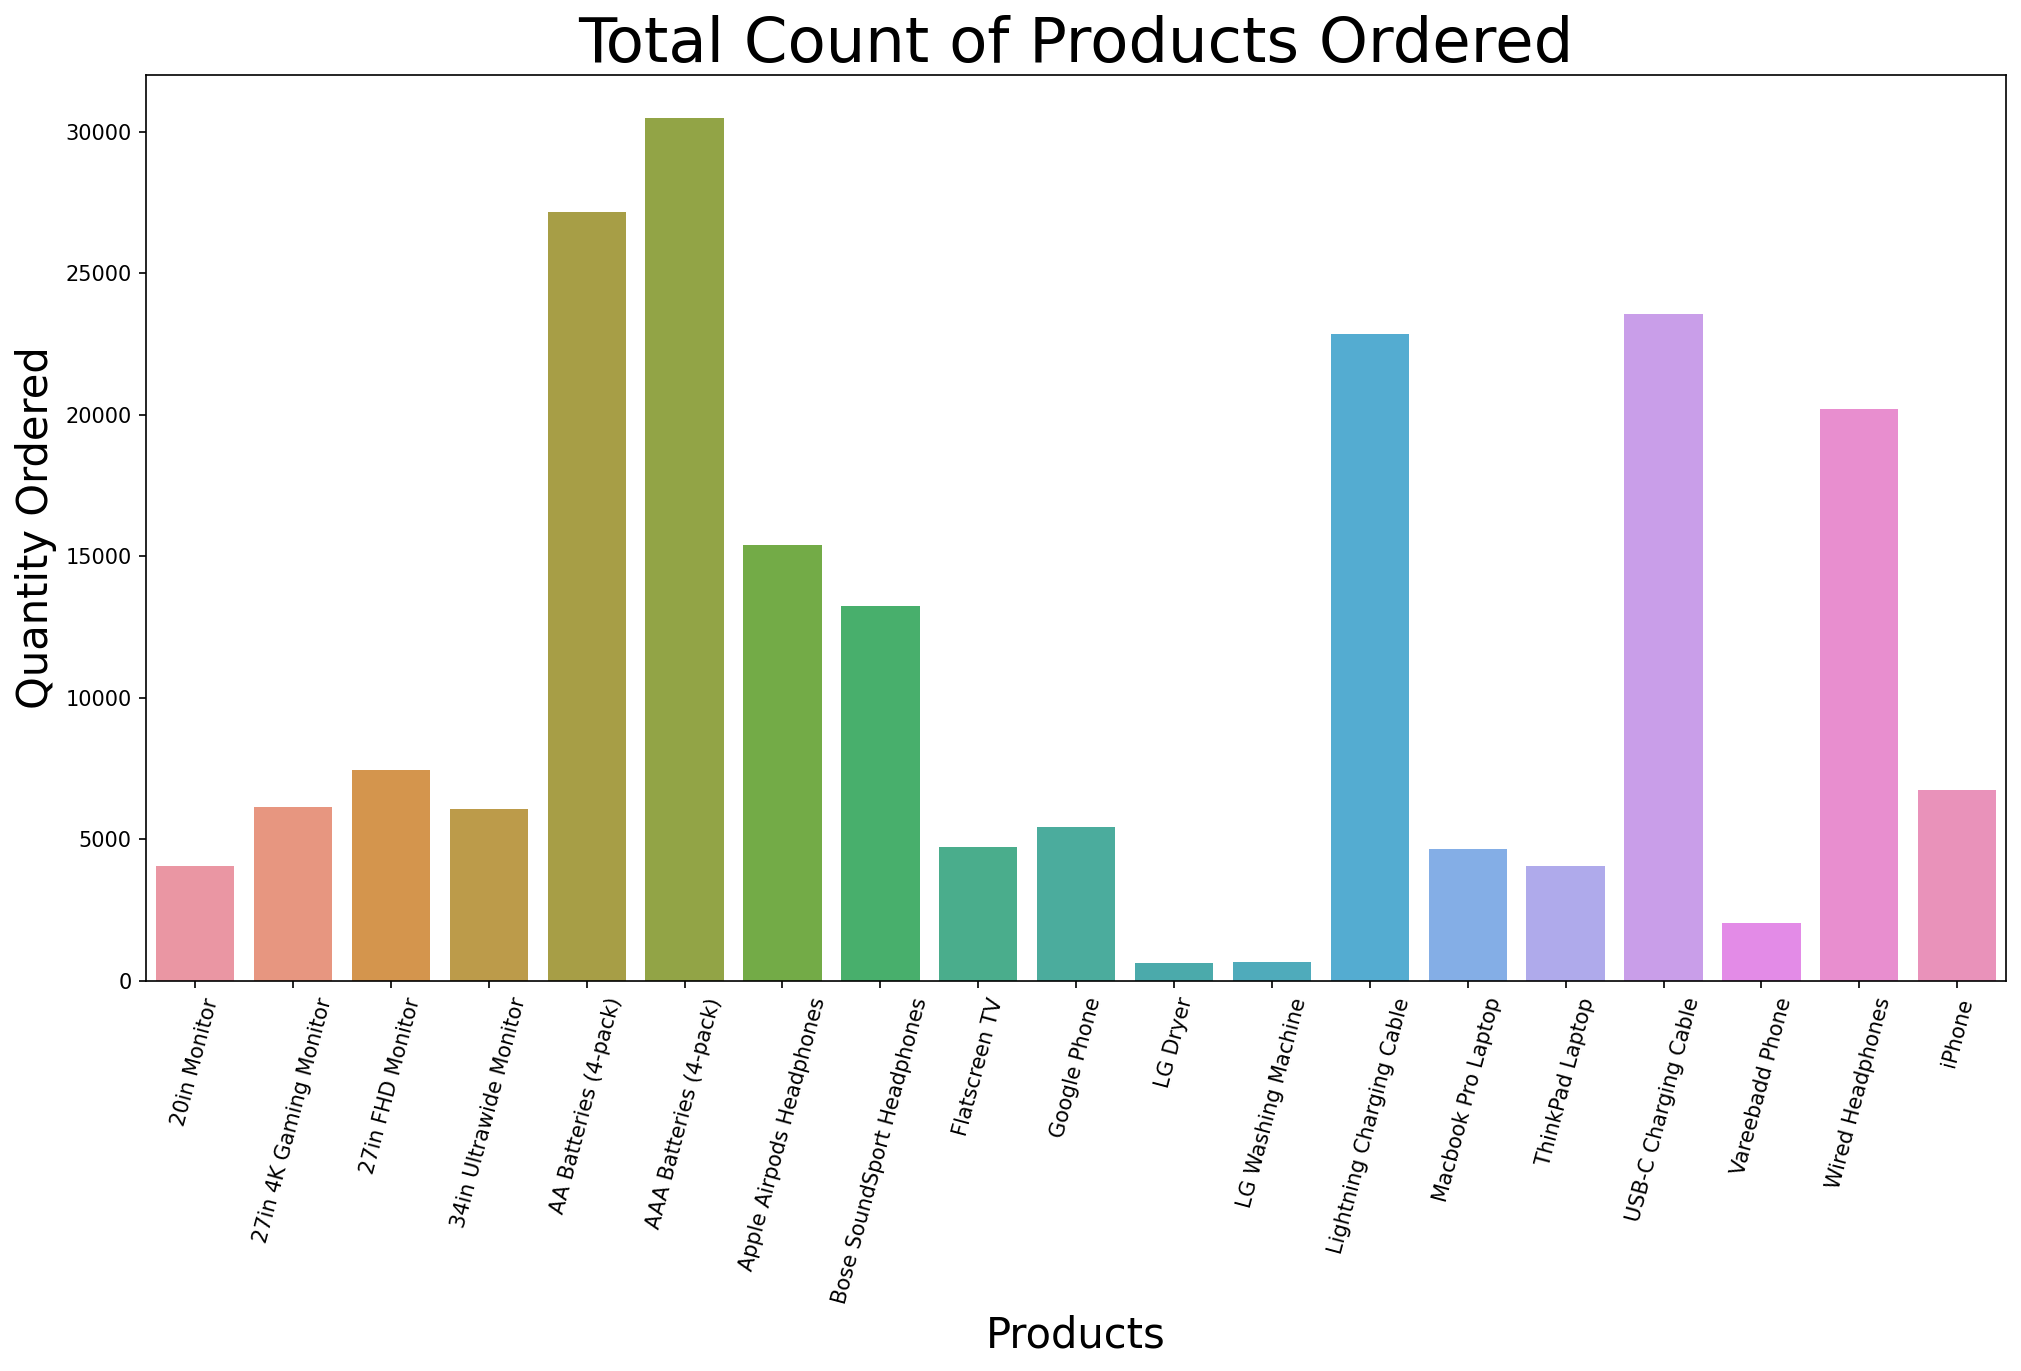

In [20]:
plt.figure(figsize = (16,8), dpi = 150)
sns.barplot(y = 'quantity ordered', x = 'product', data = total_ordered_product)
plt.xticks(rotation = 75, multialignment = 'right')
plt.title('Total Count of Products Ordered', size = 30)
plt.ylabel('Quantity Ordered', size = 20)
plt.xlabel('Products', size = 20);

In [21]:
# View the chart above in tabular form sorted by highest volume products
total_ordered_product.sort_values('quantity ordered', ascending = False, ignore_index = True)

,product,quantity ordered
0,AAA Batteries (4-pack),30487
1,AA Batteries (4-pack),27148
2,USB-C Charging Cable,23555
3,Lightning Charging Cable,22841
4,Wired Headphones,20201
5,Apple Airpods Headphones,15383
6,Bose SoundSport Headphones,13236
7,27in FHD Monitor,7429
8,iPhone,6732
9,27in 4K Gaming Monitor,6134


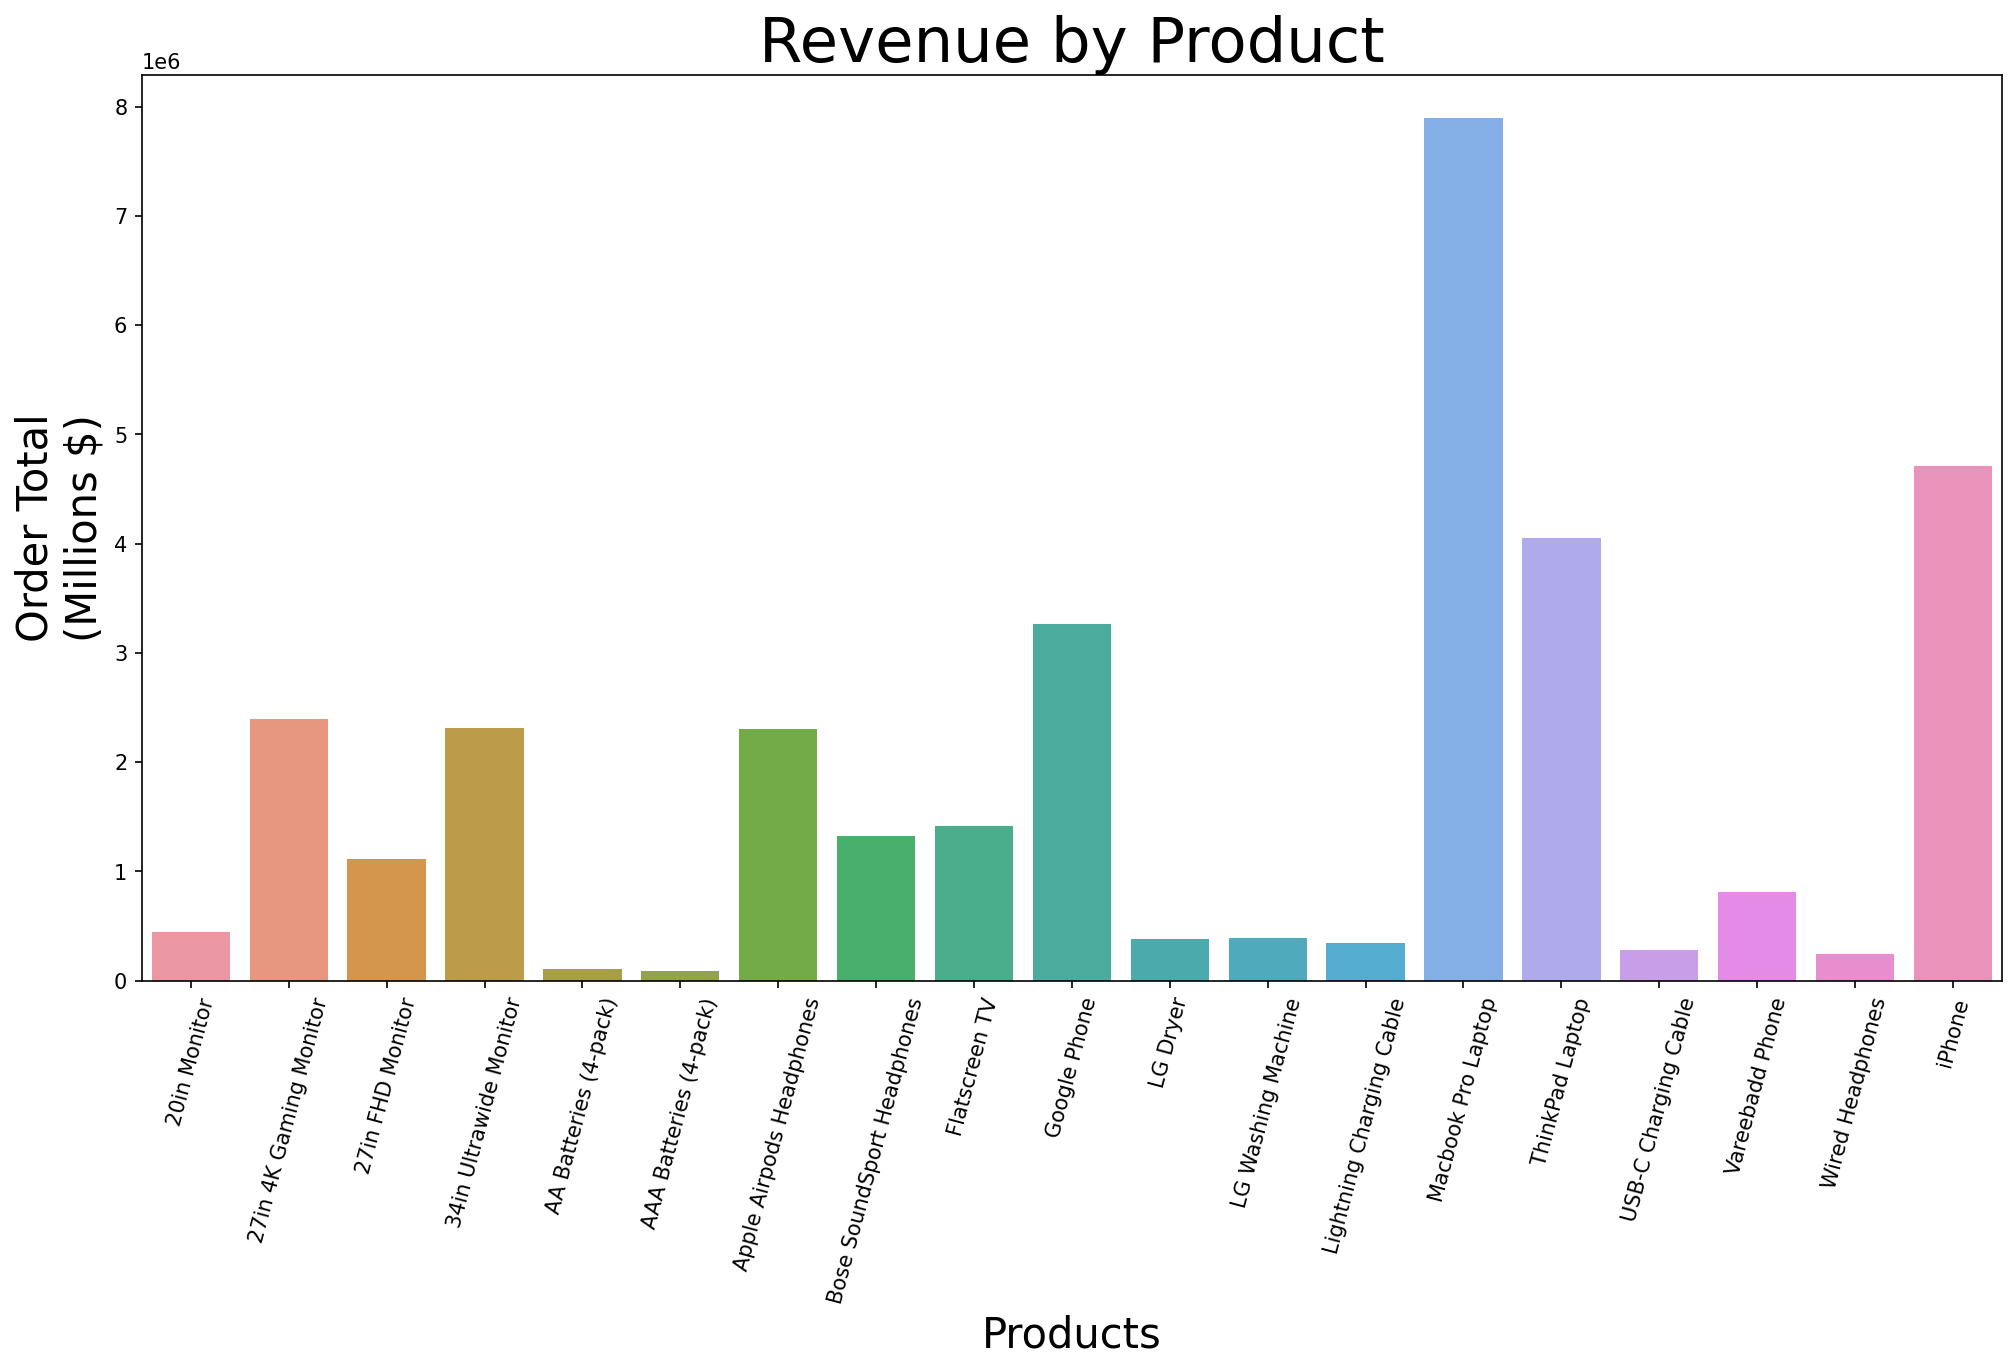

In [22]:
revenue_by_product = df.groupby('product', as_index = False)['order_total'].sum()

plt.figure(figsize = (16,8), dpi = 150)
sns.barplot(y = 'order_total', x = 'product', data = revenue_by_product)
plt.xticks(rotation = 75, multialignment = 'right')
plt.title('Revenue by Product', size = 30)
plt.ylabel('Order Total' '\n' '(Millions $)', size = 20)
plt.xlabel('Products', size = 20);

In [23]:
# chart above in tabular form sorted by highest order total
revenue_by_product.sort_values('order_total', ascending = False, ignore_index = True)

,product,order_total
0,Macbook Pro Laptop,7896500.00
1,iPhone,4712400.00
2,ThinkPad Laptop,4053959.46
3,Google Phone,3264000.00
4,27in 4K Gaming Monitor,2392198.66
5,34in Ultrawide Monitor,2308819.24
6,Apple Airpods Headphones,2307450.00
7,Flatscreen TV,1417200.00
8,Bose SoundSport Headphones,1323467.64
9,27in FHD Monitor,1114275.71


In [24]:
total_ordered_state= df.groupby('state', as_index = False)['quantity ordered'].sum()
total_ordered_city = df.groupby('city', as_index = False)['quantity ordered'].sum()

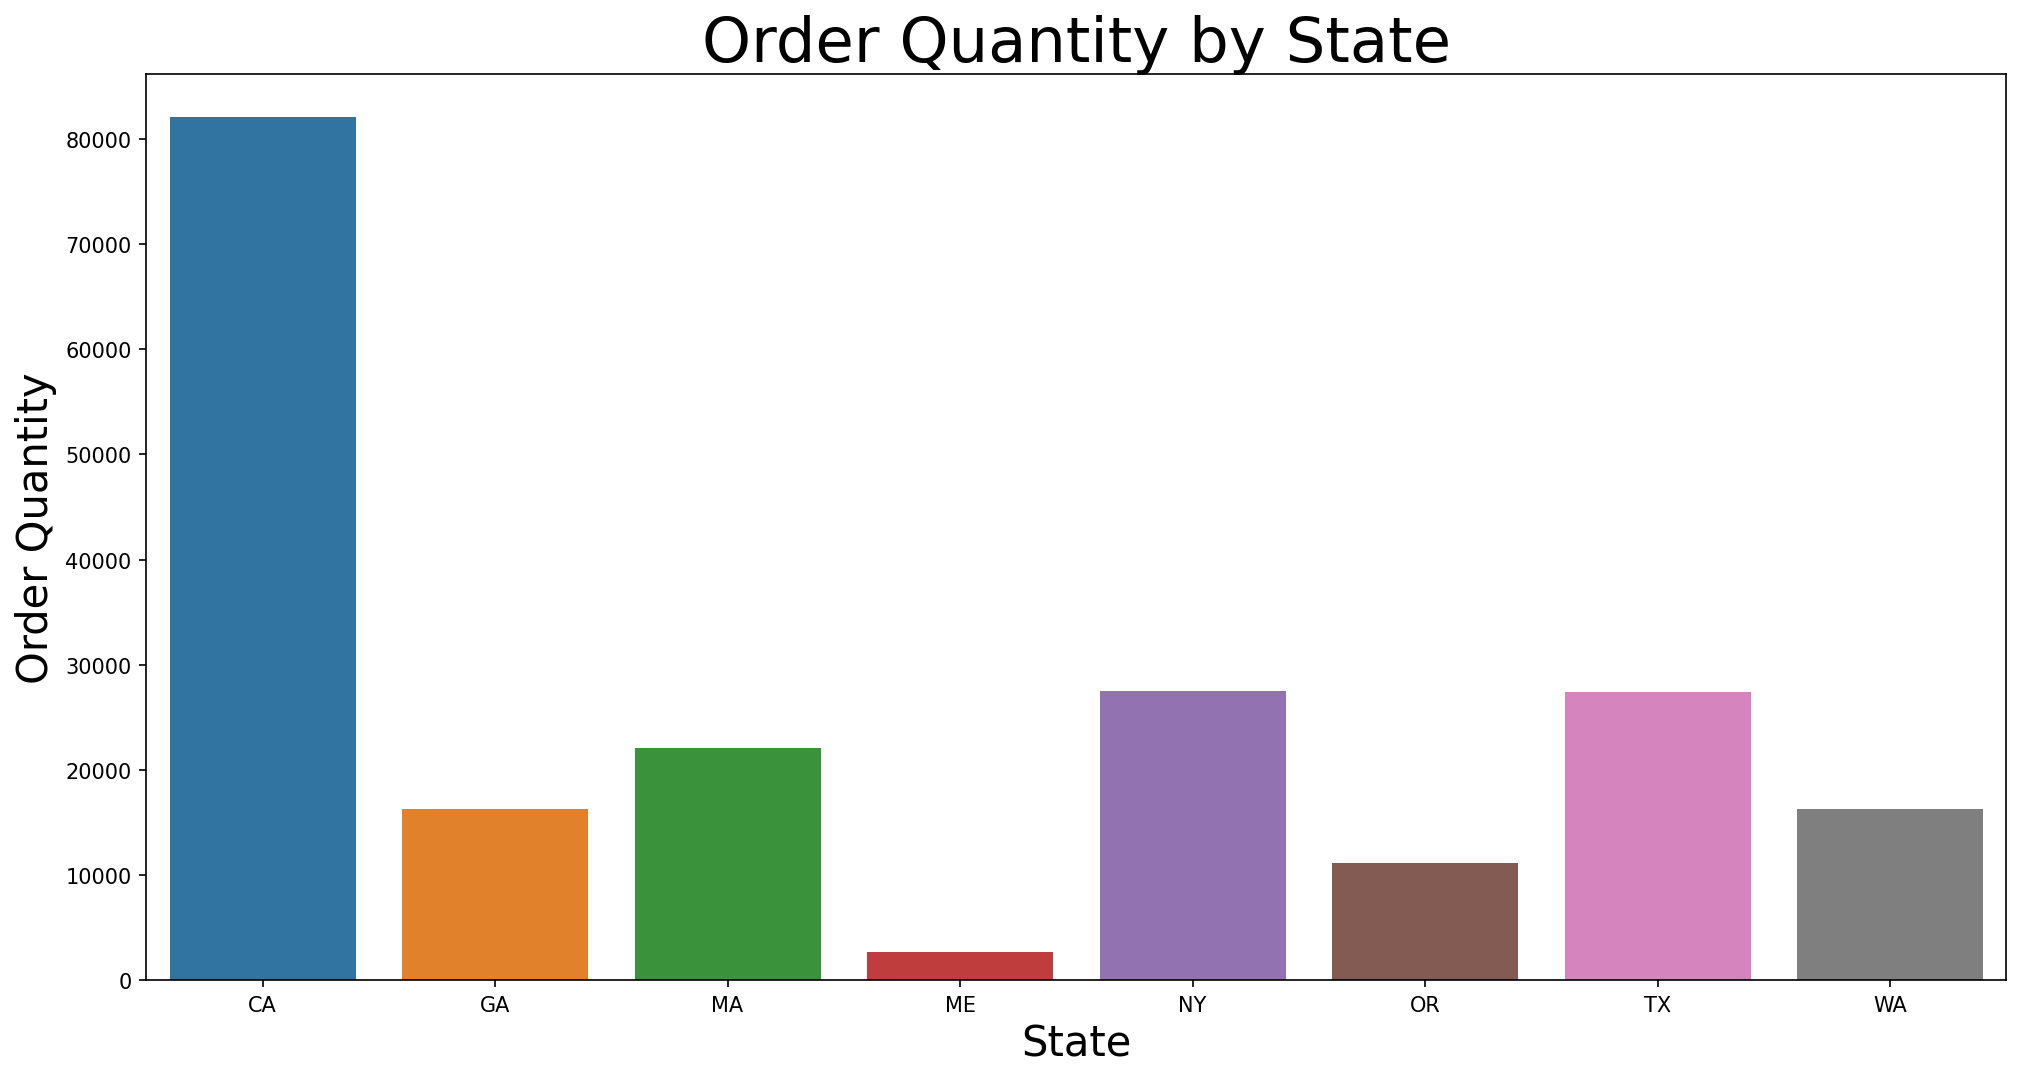

In [25]:
plt.figure(figsize = (16,8), dpi = 150)

sns.barplot(x = 'state', y = 'quantity ordered', data = total_ordered_state)
plt.title('Order Quantity by State', size = 30)
plt.ylabel('Order Quantity', size = 20)
plt.xlabel('State', size = 20);

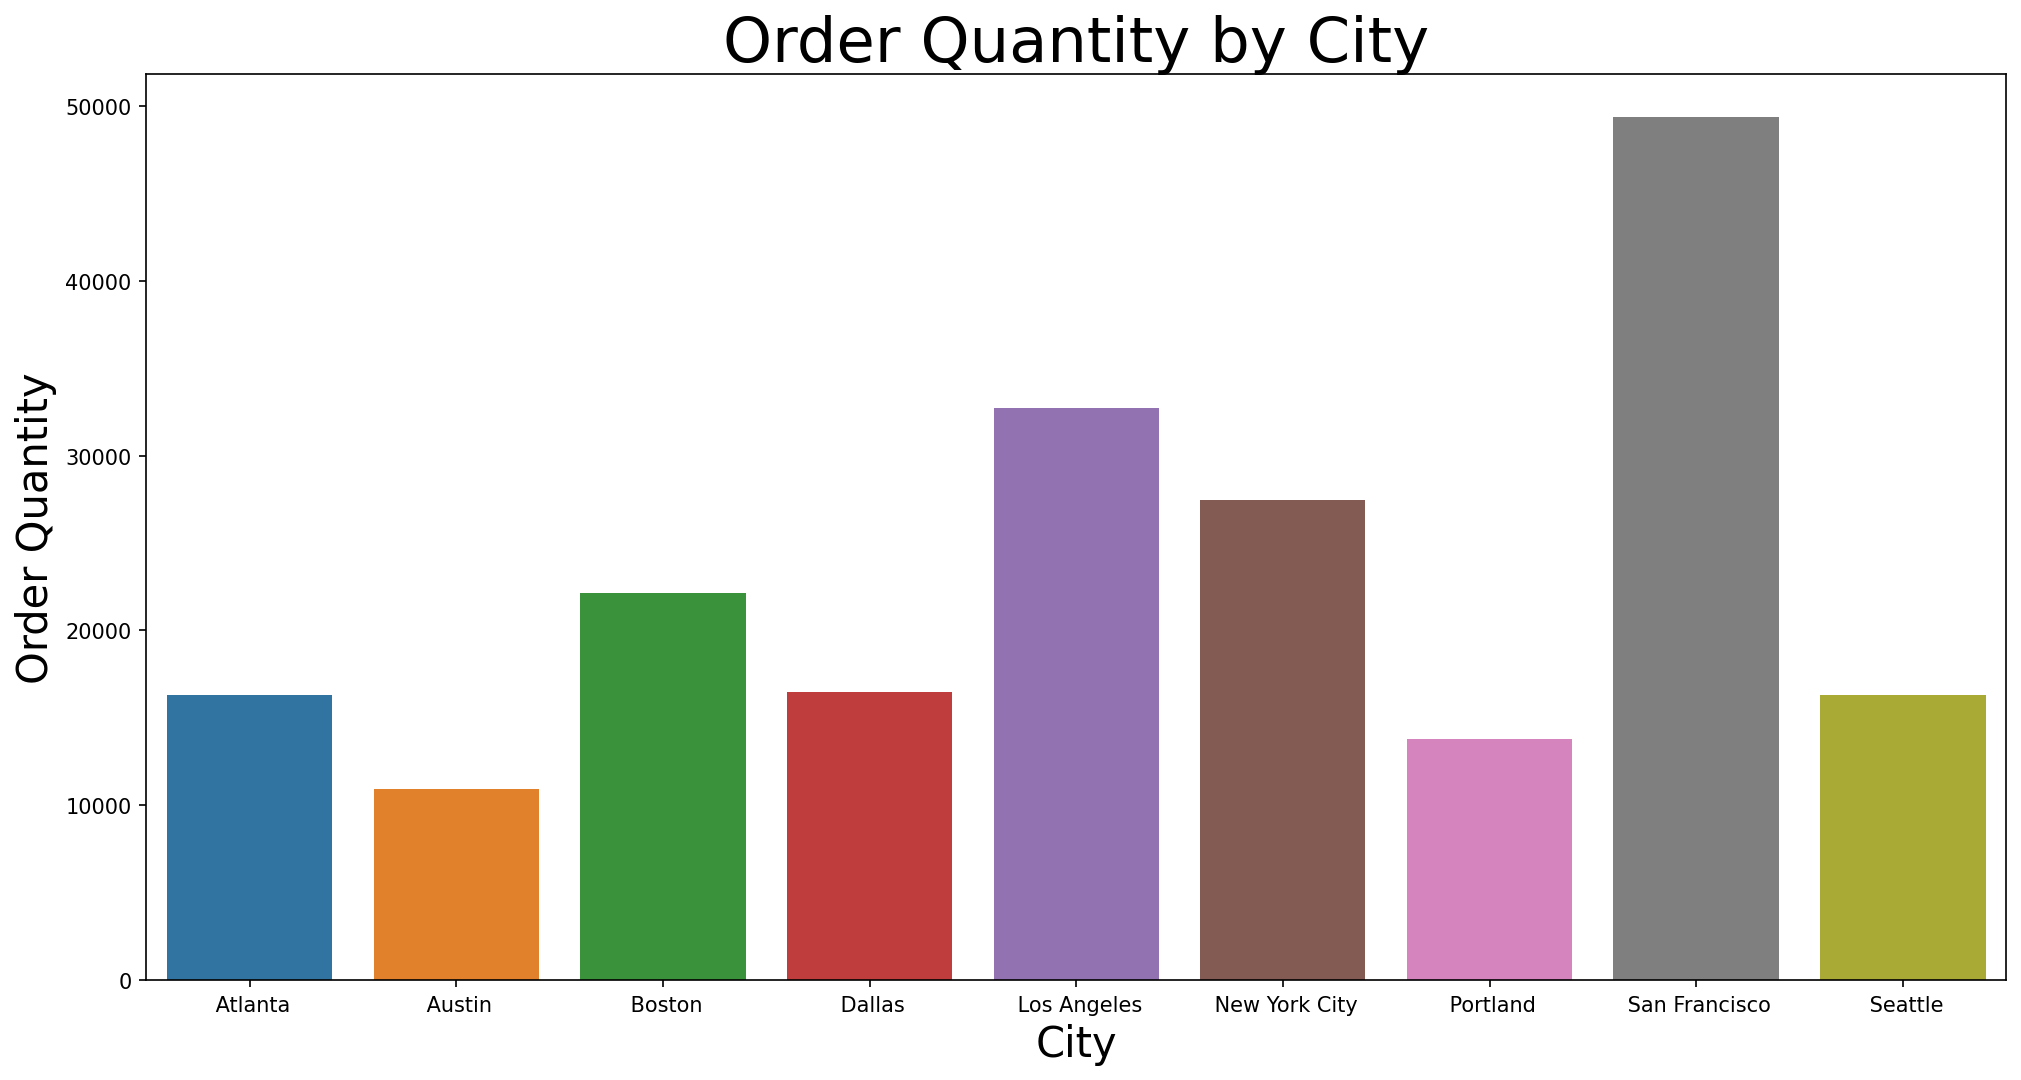

In [26]:
plt.figure(figsize = (16,8), dpi = 150)

sns.barplot(x = 'city', y = 'quantity ordered', data = total_ordered_city)
plt.title('Order Quantity by City', size = 30)
plt.ylabel('Order Quantity', size = 20)
plt.xlabel('City', size = 20);

In [27]:
# Create a df for groupby order date

total_order_month = df.groupby(df['order date'].dt.month ).sum()

total_order_month

,quantity ordered,price each,order_total,address_id
order date,,,,
1,10670,1776155.79,1786511.29,477250640
2,13162,2145208.87,2158127.48,346592316
3,16697,2740393.12,2755969.40,868329900
4,20226,3313522.35,3336376.42,1346954767
5,18344,3084756.09,3101881.04,294941395
6,14964,2508863.49,2524464.99,1322930233
7,15781,2572764.75,2587444.91,1172969557
8,13185,2178183.81,2191698.31,66070489
9,12827,2038019.59,2050361.26,756164269


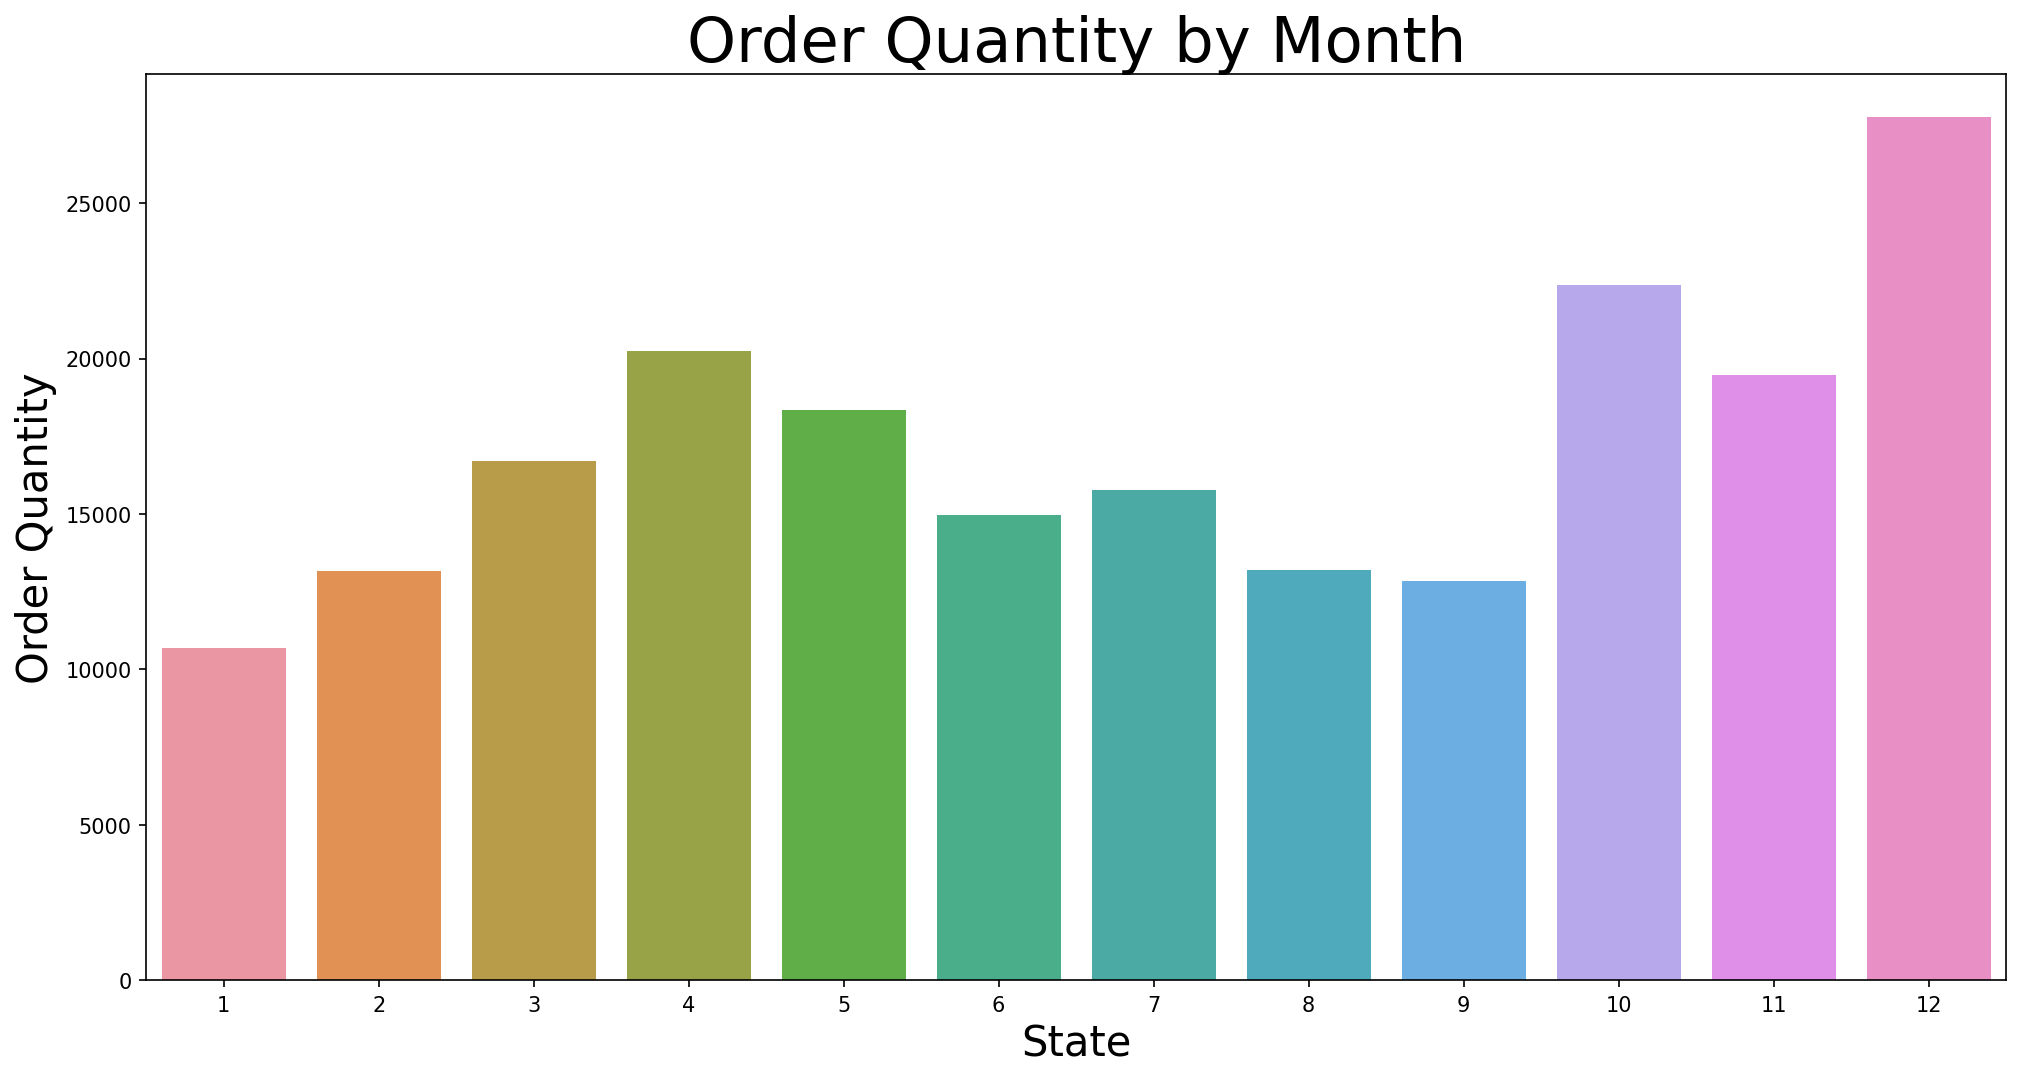

In [28]:
plt.figure(figsize = (16,8),dpi = 150)
plt.xticks(range(1,13))
sns.barplot(x = total_order_month.index, y = 'quantity ordered', data = total_order_month)

plt.title('Order Quantity by Month', size = 30)
plt.ylabel('Order Quantity', size = 20)
plt.xlabel('State', size = 20);

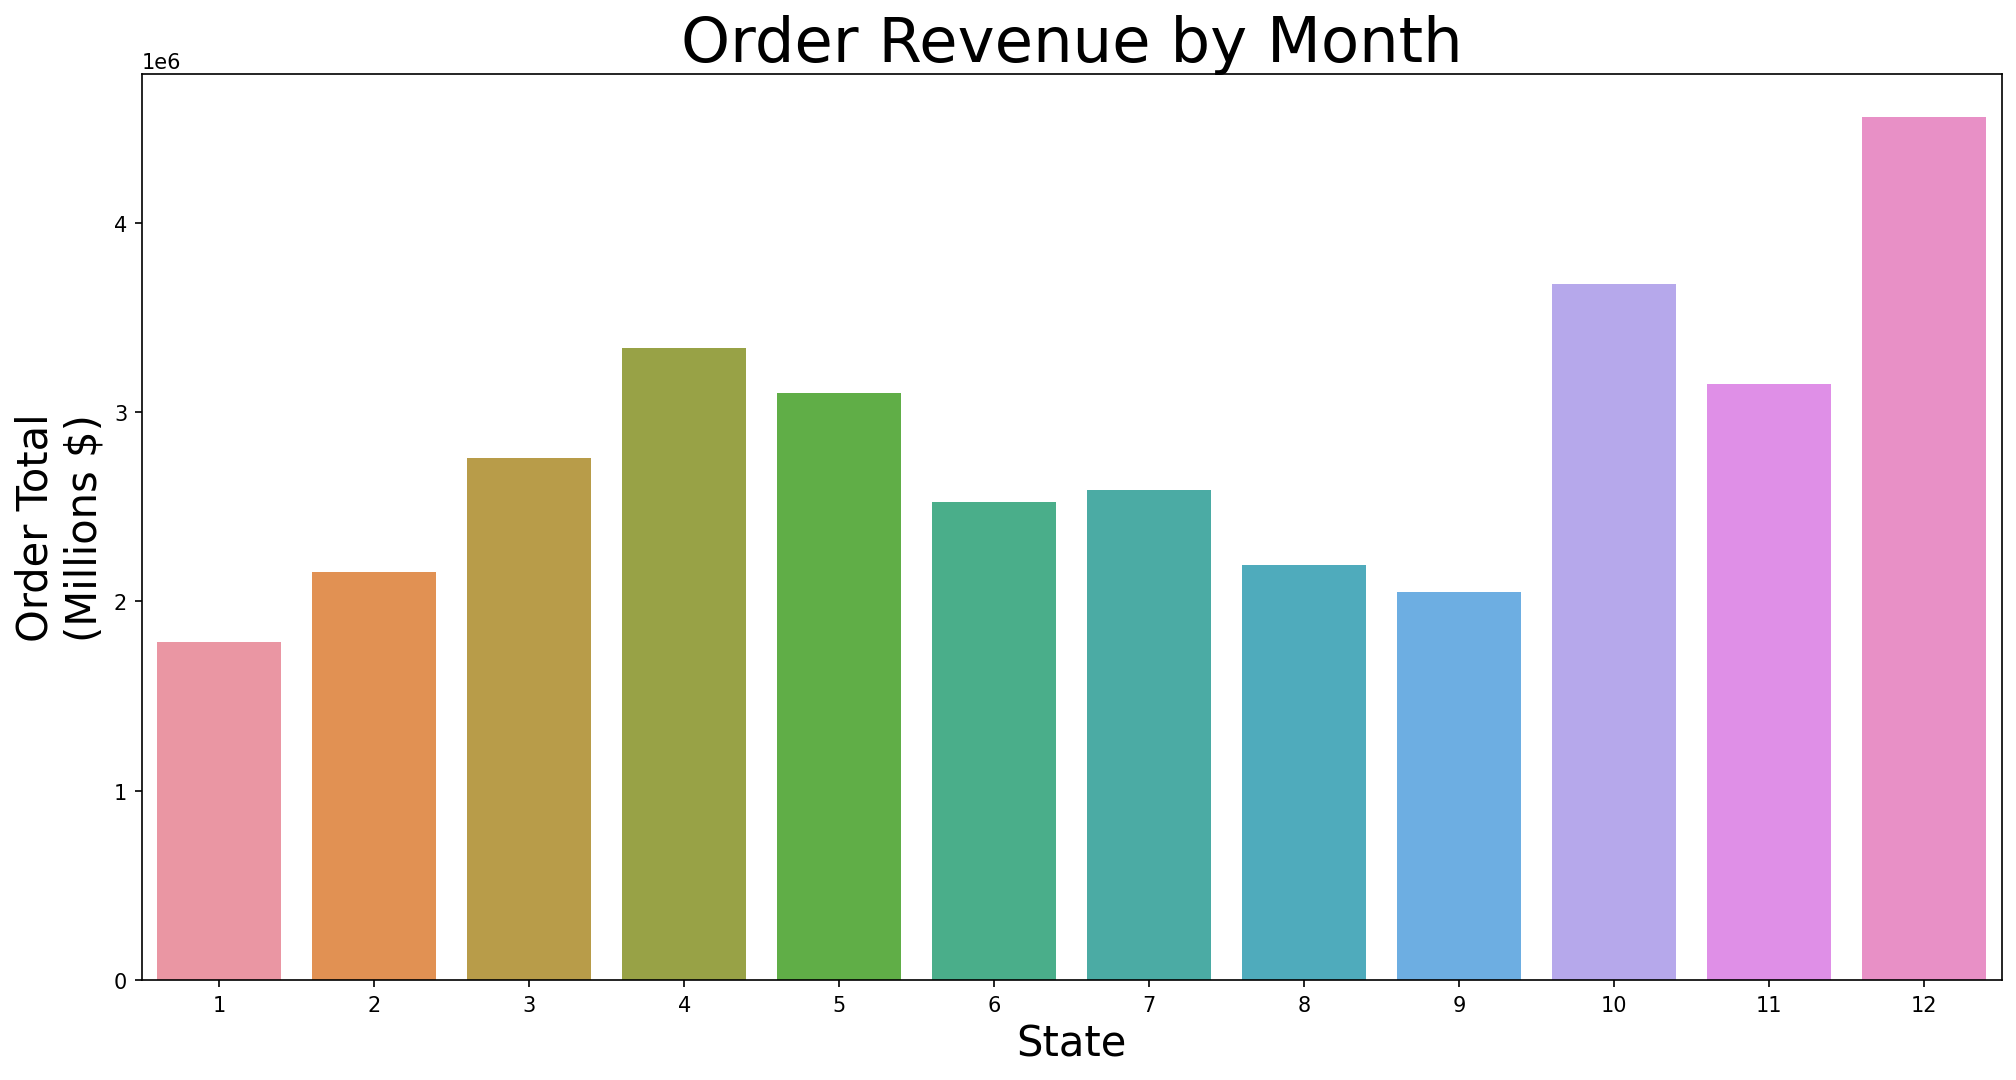

In [29]:
plt.figure(figsize = (16,8),dpi = 150)

sns.barplot(x = total_order_month.index, y = 'order_total', data = total_order_month)

plt.title('Order Revenue by Month', size = 30)
plt.ylabel('Order Total' '\n' '(Millions $)', size = 20)
plt.xlabel('State', size = 20);

In [30]:
df.head()

,order id,product,quantity ordered,price each,order_total,order date,purchase address,city,state,address_id
0,236670,Wired Headphones,2,11.99,23.98,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",Seattle,WA,0
1,236671,Bose SoundSport Headphones,1,99.99,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",Dallas,TX,1
2,236672,iPhone,1,700.00,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",Portland,OR,2
3,236673,AA Batteries (4-pack),2,3.84,7.68,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",Los Angeles,CA,3
4,236674,AA Batteries (4-pack),2,3.84,7.68,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",New York City,NY,4


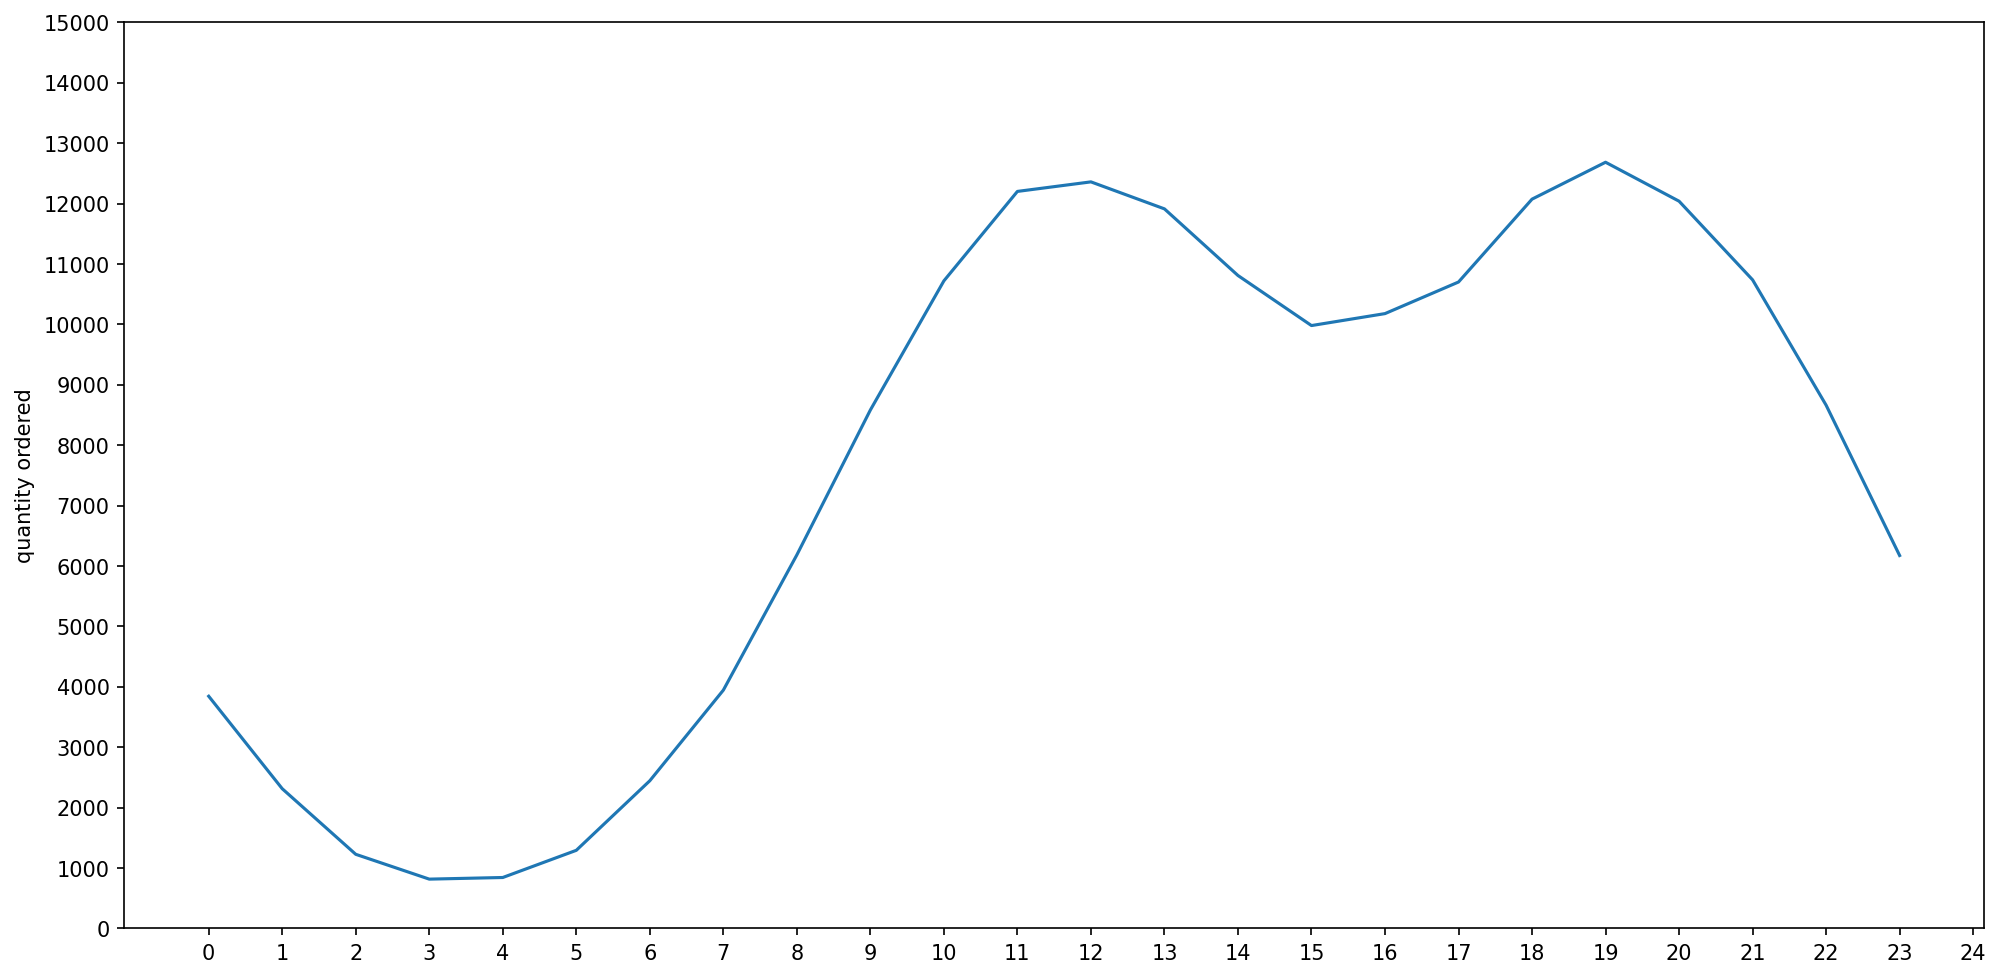

In [31]:
#Create a df to view orders by time of day

order_count_time = df.groupby(df['order date'].dt.hour, as_index = False)['quantity ordered'].count()

plt.figure(figsize = (16,8),dpi = 150)
sns.lineplot(x = order_count_time.index, y = 'quantity ordered', data = order_count_time)
plt.xticks(range(0,25))
plt.yticks(range(0,16000,1000));
